Submission deadline of your material is EoD (End of Day) Monday the 19th October 11:59 pm
* Live presentation to the class is on Tuesday the 20th October (15-16:20, and 16:30-17:50), through Hybrid class at IE facilities (1/4 in classroom, and 1/4 online for each session)
* The medium to be used can be a Jupyter notebook, Power Points, Power BI dashboards, or a combination of the three
* You will have 20 mins to present. 15' of actual presentation and 5' of questions (All group members are expected to participate)
* Questions are expected to come from the other groups and their participation will be taken into account as part of class participation (e.g. recommendations, constructive feedback, challenges to the charts/ insights "So what?", etc.)

Key considerations and recommendations:

The three fundamental points of evaluation are:
* The development of a logical, well structured, and easy to follow storyline (i.e. Situation, Problem, Questions/ Answer, Impact + A well-framed solution i.e. MECE Pyramid)
* The showcase of suitable, well-constructed plots that support and provide solid evidence to the arguments (i.e. right plots for the right analyses) with their corresponding "So What?" answer
* The richness, diversity, creativity, and quality of the visualizations (Use of plots seen in class, and hopefully beyond)
* You may leave some charts, data transformation, additional analysis for the back-up. If you have the time, take us through those additional analyses you didn't cover as part of the main presentation or storyline
* You don't have to answer all the questions you may come up with, try to focus on the most relevant and interesting ones
* Distribute your timing wisely, and make sure everyone has the opportunity to contribute and participate in the presentation
* For this class, we're not interested in ML models, but perhaps in the implications derived from your analysis for your future models, additional data required, or further wrangling on the data
* This is not simply an Exploratory Data Analysis (EDA), you're expected to come up with a hypothesis, and try to answer it through your analysis

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import seaborn as sns
import sklearn
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plt.style.use('default')

In [2]:
# Loading some sample data
df = pd.read_csv('HoneyNeonic.csv')
weather_df=pd.read_csv("Weather_US_Total_Averages.csv")
temp_df = pd.read_csv("Statewise temperatures.csv", sep=";")
crops_yield = pd.read_csv("crops yield.csv", sep=",")

In [3]:
# weather_df= weather_df.drop(columns=["Unnamed: 3","Unnamed: 4","Unnamed: 5","Source: https://www.ncdc.noaa.gov/cag/national/time-series/110/tavg/4/9/1995-2020?base_prd=true&begbaseyear=1901&endbaseyear=2020"],axis=1)
crops_yield_fin = crops_yield[crops_yield['Year Code'] > 1994].sort_values(by='Year Code')



# creating apples with bee DF
crops_bees=crops_yield_fin.copy()
crops_bees=crops_bees.merge(df,how='left', left_on='Year', right_on="year")#.drop(columns="year",axis=0)
crops_bees=crops_bees.groupby(["Year","Item"]).mean()
crops_bees=crops_bees.reset_index()
crops_bees_apples=crops_bees[crops_bees["Item"]=="Apples"]

In [4]:
# Define the regions as a dictionary to convert to a data frame to enrich the original dataset

state_regions = {
    'AK': 'West',
    'AL': 'South',
    'AR': 'South',
    'AZ': 'West',
    'CA': 'West',
    'CO': 'West',
    'CT': 'Northeast',
    'DC': 'South',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'IA': 'Midwest',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'MA': 'Northeast',
    'MD': 'South',
    'ME': 'Northeast',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MO': 'Midwest',
    'MS': 'South',
    'MT': 'West',
    'NC': 'South',
    'ND': 'Midwest',
    'NE': 'Midwest',
    'NH': 'Northeast',
    'NJ': 'Northeast',
    'NM': 'West',
    'NV': 'West',
    'NY': 'Northeast',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'Northeast',
    'PR': 'Northeast',
    'RI': 'Northeast',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VA': 'South',
    'VT': 'Northeast',
    'WA': 'West',
    'WI': 'Midwest',
    'WV': 'South',
    'WY': 'West'
}

Regions = pd.DataFrame(state_regions,index=[0])
Regions = Regions.transpose()
Regions= Regions.rename(columns={0:"regions"})

#Enrich the current dataset by adding the regions for each states (merging data frames)

In [5]:
# Defining the final dataframe ('df') merging the regions to the original dataframe
dfinal = pd.merge(df, Regions, how='left', left_on='state', right_on=Regions.index).rename(columns={0:"regions"})

#Calculating the consumption of honey by utilizing the production of honey minus the stocks of honey annually 
#and adding it to the final dataframe

dfinal['consumption'] = dfinal['totalprod'] - dfinal['stocks']

### Comment: Calculating the consumption can give us further insights into "the world of honey", and give indications on whether changes in consumption has been the driver behind some of the trends that are observed.

In [6]:
# Checking for null values 
dfinal.groupby("state").count()
missing_years = dfinal.groupby("state").count()["year"] != 15
missing_years[missing_years].index

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')

### Comment: Even though it was previously shown that the dataset did not contain any NA values, some states have less than 15 observations. Please refer to the other useful information below:
Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

Source: https://www.kaggle.com/jessicali9530/honey-production

In [7]:
#Remove states with insufficient data
dfinal.drop(dfinal[dfinal['state'].isin(['MD', 'NV', 'OK', 'SC'])].index, inplace=True)

#Check for missing values
missing_years = dfinal.groupby("state").count()["year"] != 15
missing_years[missing_years].index

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN',
       'KS', 'KY', 'LA', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')

# Lets talk about bees

## BUSY BEES - 3 Interesting facts about bees!
- Almost 90% of wild plants and 75% of leading global crops depend on animal pollination. 
- One out of every three mouthfuls of our food depends on pollinators. 
- Crops that depend on pollination are five times more valuable than those that do not.

Source: https://www.wwf.org.uk/learn/fascinating-facts/bees

In [8]:
from IPython.display import Image
Image(filename="Beebee.jpg")

## Number of colonies across regions of the United States over several years

In [9]:
# Stacked barchart  of the stocks for each region 

#Creating the data frame for the plot
bars_df = dfinal.groupby(['year', 'regions'])['numcol'].sum().div(10**6).unstack('regions')

# Adding variables to the plot
ax = bars_df.plot(kind='bar', stacked=True,figsize=(10,6),\
                  title = 'Number of Colonies For Each Region From 1991-2017', fontsize=13)\

# Ploting a legend
var = ax.legend(frameon=False)

# Rotation of x-axis
s = ax.set_ylim(0,4)
s1 = ax.set_xlabel("Years")
s2 = ax.set_ylabel("Number of Colonies (Millions of Colonies)")
s = ax.set_xticklabels(labels = bars_df.index,rotation=90)

## The number of colonies has been fairly consistent but showing a slight decline
this has been a concern for a number of years, but are the bees really in trouble? what seems to be going on? Is this something of potential financial impact?

-----


## The number of colonies has been fairly consistent but showing a slight decline
this has been a concern for a number of years, but are the bees really in trouble? what seems to be going on? Is this something of potential financial impact?

-----------------

## Annual yield per colony (in lbs) by region 

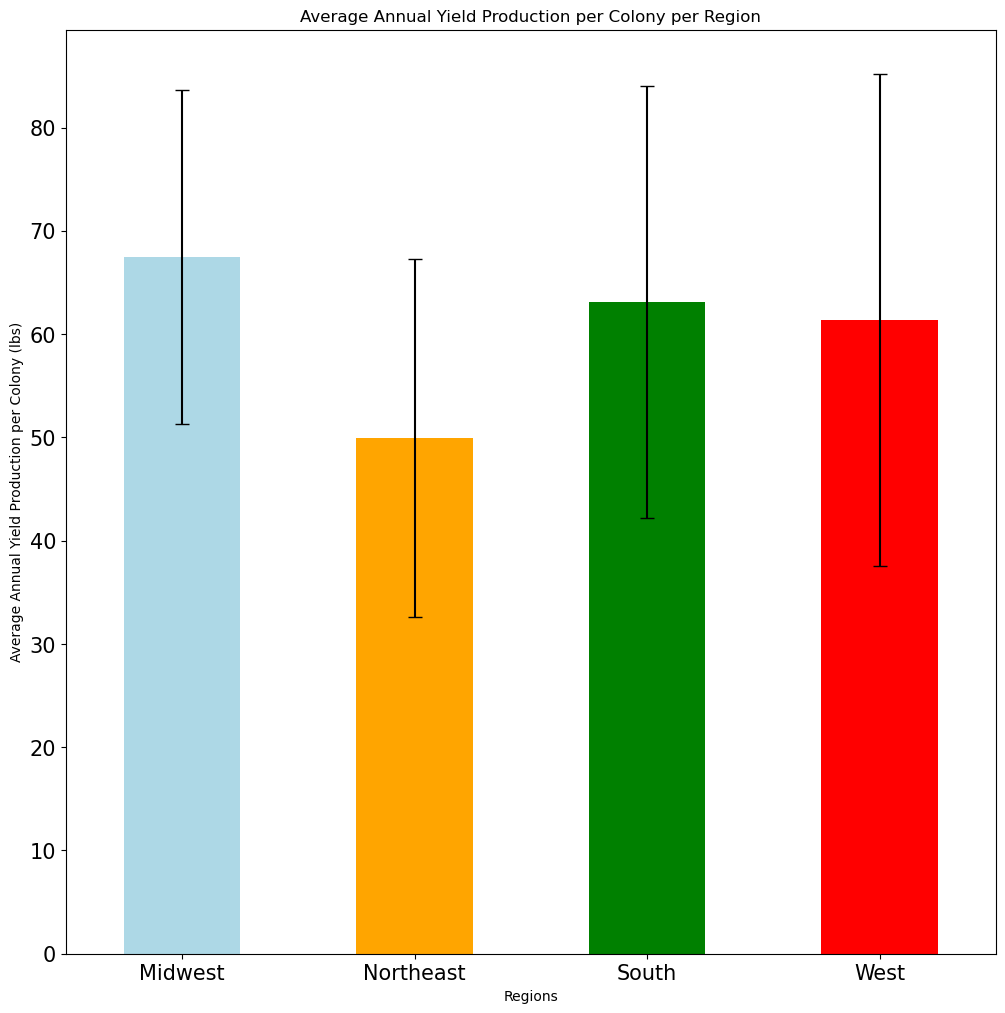

In [10]:
# Whisker plot of the average yield per colony per region

#Creating the data frame for the plot
whiskers_df=dfinal.groupby(['regions']).mean()[["yieldpercol"]]
whiskers_df["yerr"] = dfinal.groupby(['regions']).std()[['yieldpercol']]

#Plot of the average price per pound per region
ax = whiskers_df["yieldpercol"].plot(kind='bar', yerr = whiskers_df["yerr"], capsize = 5,figsize=(12,12),\
      color = ['lightblue','orange','green','red'], \
      title = 'Average Annual Yield Production per Colony per Region', fontsize=15)

s1 = ax.set_xlabel("Regions")
s2 = ax.set_ylabel("Average Annual Yield Production per Colony (lbs)")
s3 = ax.set_xticklabels(labels = sorted(dfinal['regions'].unique()),rotation=0)

### The average yield per colony in the regions varied slightly, however the deviations were relatively constant, which was approximately +/- 25 lbs per colony. Midwest is the higest producing while Northeast is the lowest producing. Possibly due to temperature

### We want to investigate what is causing these changes in yield and production

--------------------

## Historical Honey Production (in lbs) Per Region, Averaged Across States

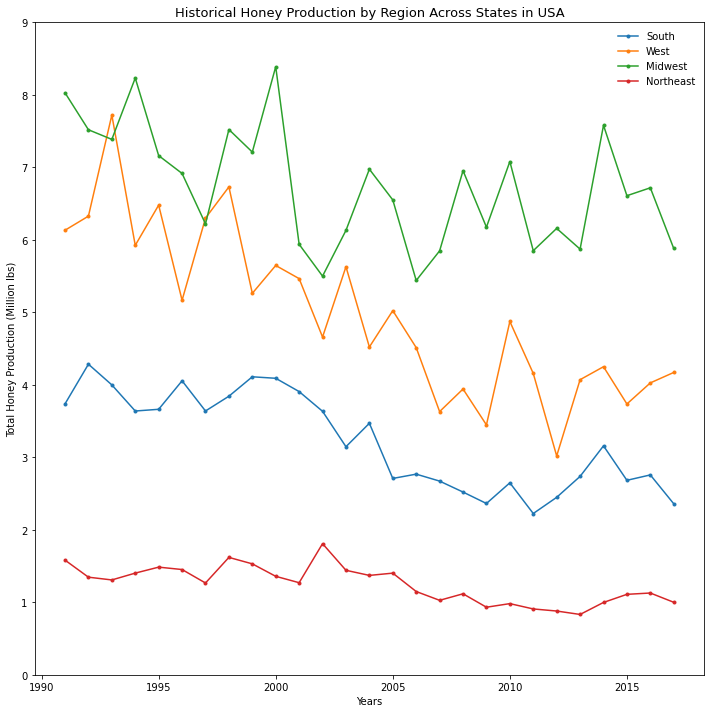

In [11]:
# Allow plots to te embedded within the notebook
%matplotlib inline
# Adding variables to the plot - fig and ax (Figure and axes)
fig, ay = plt.subplots(figsize = (12, 12))

# Setting up the outer plot text (titles and labels)
ay.set_xlabel('Years')
ay.set_ylabel('Total Honey Production (Million lbs)')
ay.set_title('Historical Honey Production by Region Across States in USA', fontsize=13)
 

for j in dfinal["regions"].unique():
    Y = pd.DataFrame(dfinal.loc[dfinal["regions"] == j,].groupby(["year"])["totalprod"].mean())
    ay.plot(Y.index, Y["totalprod"].div(10**6), marker = '.', label = j)

ay.set_ylim([0,9])
    
# Ploting a legend
var = ay.legend(loc='upper right',frameon=False)


### Honey production seems to have a slight downward trend, and it is observed that Midwest states produce  more honey than the other regions on average. Even though the number of colonies is relatively consistent, this shows that bees are producing less, and could effectively be less efficient at pollinating and creating honey. This has large implications to the agricultural world

--------------

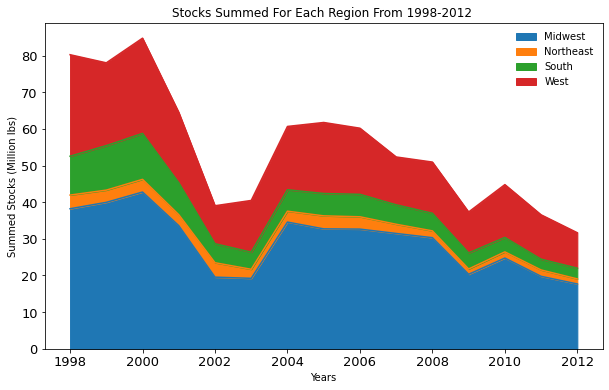

In [12]:
# Stacked barchart  of the stocks for each region 

#Creating the data frame for the plot
bars_df = dfinal.groupby(['year', 'regions'])['stocks'].sum().div(10**6).unstack('regions').loc[1998:2012,]

# Adding variables to the plot
ax = bars_df.plot(kind='area', stacked=True,figsize=(10,6),\
                  title = 'Stocks Summed For Each Region From 1998-2012 ', fontsize=13)\

# Ploting a legend
var = ax.legend(frameon=False)

# Rotation of x-axis
s1 = ax.set_xlabel("Years")
s2 = ax.set_ylabel("Summed Stocks (Million lbs)")
s3= plt.xticks(np.arange(min(bars_df.index), max(bars_df.index)+1, 2.0))


### The amount of stock that we have of honey has also been decreasing. Considering the historical picture; the supply-demand balance is not in favor of the supply side in the recent years. All of this leads us to believe that there is less honey being produced, and there is something happening to the bees.

## What could possible be the cause for this?
-----------------------


# Historical Beehive Yield Per Region, Averaged Across States FIND ANOTHER WAY TO GRAPH THIS

In [13]:
# Allow plots to te embedded within the notebook
%matplotlib inline
# Adding variables to the plot - fig and ax (Figure and axes)
fig, ay = plt.subplots(figsize = (12, 12))

# Setting up the outer plot text (titles and labels)
ay.set_xlabel('Years')
ay.set_ylabel('Average Honey Yield per Colony')
ay.set_title('Historical Colony Yield by Region Across States in USA', fontsize=13)
 

for j in dfinal["regions"].unique():
    Y = pd.DataFrame(dfinal.loc[dfinal["regions"] == j,].groupby(["year"])["yieldpercol"].mean())
    ay.plot(Y.index, Y["yieldpercol"], marker = 'x', label = j)

    #turn this into an area chart#
    
# ay.set_ylim([0,9])
    
# Ploting a legend
var = ay.legend(loc='upper right',frameon=False)

### So What? 
### Honey production seems to have a slight downward trend, and it is observed that Midwest states produce  more honey than the other regions on average.

## Total Number of Colonies Northeast and West

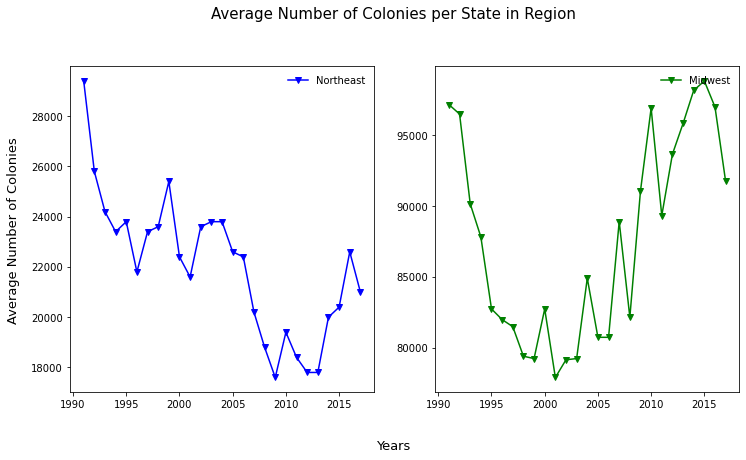

In [14]:
# Allow plots to te embedded within the notebook
%matplotlib inline
# Adding variables to the plot - fig and ax (Figure and axes)
fig, axes = plt.subplots(1,2, figsize = (10, 10))

# Get the series of interest
U = pd.DataFrame(dfinal.loc[dfinal["regions"] == "Northeast",].groupby(["year"])["numcol"].mean())
V = pd.DataFrame(dfinal.loc[dfinal["regions"] == "Midwest",].groupby(["year"])["numcol"].mean())

# Draw each plot
axes[0].plot(U.index, U["numcol"],color = "b",marker="v",label="Northeast")
axes[1].plot(V.index, V["numcol"], color = "g",marker="v",label="Midwest")

# Add labels
fig.text(0.5, 0, 'Years', ha='center', va='center',fontsize=13)
fig.text(0.06, 0.5, 'Average Number of Colonies', ha='center', va='center', rotation='vertical',fontsize=13) 
fig.text(0.5, 1, 'Average Number of Colonies per State in Region', ha='center', va='center',fontsize=15)

# Ploting the legends
axes[0].legend(loc='upper right',frameon=False)
axes [1].legend(loc='upper right',frameon=False)


# Adjusting the figure size
fig.set_size_inches(12, 6)

# Adjust background and axis colors for both graphs
axes[0].set_facecolor('white')
axes[0].spines["bottom"].set_color("black")
axes[0].spines["left"].set_color("black")

axes[1].set_facecolor('white')
axes[1].spines["bottom"].set_color("black")
axes[1].spines["left"].set_color("black")

### The total number of colonies from both the highest producing region (Midwest) and lowest producing region (Northeast) shows that a decrease in the number of bee colonies is not isolated to a region or area, but is across both coasts of the US. Both regions have been decreasing fairly consistently, however there is an interesting uptick in 2010, particularly in the Midwest.

------
# We believe that honey bees are being affected by unseen forces, such as weather changes and the use of pesticides across the United States
-----


## Historical Yield per Colony in USA

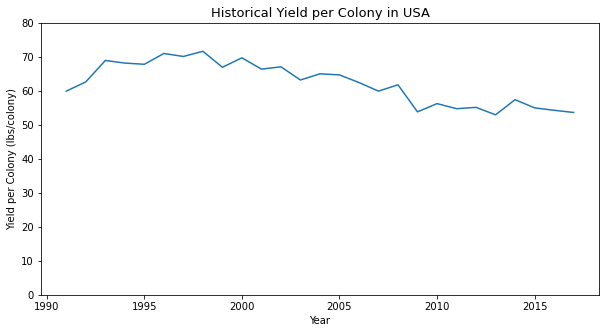

In [15]:
# Allow plots to te embedded within the notebook
%matplotlib inline

# Adding variables to the plot - fig and ax (Figure and axes)
fig, ax = plt.subplots(figsize = (10, 5))


#dfinal_roll = dfinal.rolling(window = 10, center = True, min_periods = 1).mean()

# Plot the rolling average
ax.plot(dfinal.groupby("year").mean()["yieldpercol"].index, dfinal.groupby("year").mean()["yieldpercol"])

ax.set_xlabel('Year')
ax.set_ylabel('Yield per Colony (lbs/colony)')
ax.set_title('Historical Yield per Colony in USA', fontsize=13)
var = ax.set_ylim(ymin = 0, ymax = 80)

### Taking a look at the yield per colony over time, there has been a steady decrease in honey production per hive, on average. In total yield per colony has decreased approximately by 21% (from 70lbs to below 50lbs)

# Additional insights
 
## The data shows a recipe for disaster. If the number of honey bee colonies and the yield per colony continue to decrease, the prices of honey will skyrocket. There are greater implications however for the decrease of bees, which will affect the ecosystem and food production as a whole. 

## The Intergovernmental Platform on Biodiversity and Ecosystem Services (IPBES), has estimated that the economic value of pollinators are between 200-500 Billion USD Annually, and that honey bees are the most widespread managed pollinator. The honey industry itself had a market value of 7 Billion USD in 2012. Steps should be taken to reverse the trend of decreasing colonies and yields not only in the United States, but globally.



------

    # Showing the changes of select midwestern states, as they are the states with the most beehives

--------

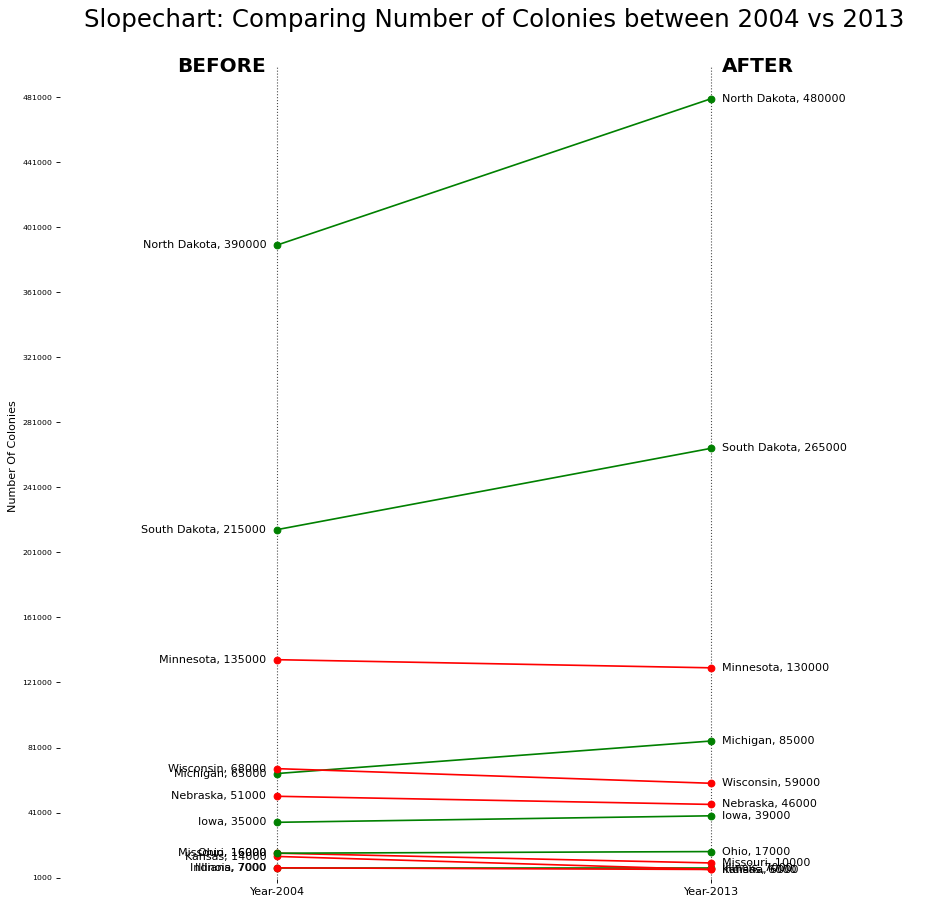

In [16]:
import matplotlib.lines as mlines

#Preparing the data to show the incline/decline in the number of colonies from 2004 to 2013 in the Midwest
df_mid = dfinal[(dfinal["Region"] == 'Midwest')]

df_alt = df_mid.pivot(index='StateName', columns='year', values='numcol')
df_alt["State"]= df_alt.index
df_alt.reset_index(drop = True)
df_sc = df_alt.rename(columns={2004: 'Year-2004',2013:'Year-2013'})

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df_sc.State, df_sc['Year-2004'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df_sc.State, df_sc['Year-2013'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df_sc['Year-2004'], df_sc['Year-2013'])]

# draw line

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=500000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=500000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df_sc['Year-2004'], x=np.repeat(1, df_sc.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df_sc['Year-2013'], x=np.repeat(3, df_sc.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df_sc['Year-2004'], df_sc['Year-2013'], df_sc['State']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':10})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 500000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 500000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing Number of Colonies between 2004 vs 2013", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,520000), ylabel='Number Of Colonies')
ax.set_xticks([1,3])
ax.set_xticklabels(["Year-2004", "Year-2013"])
plt.yticks(np.arange(1000, 500000, 40000), fontsize=7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

### In the midwest, as a whole all states have been decreasing in the number of colonies, with the exception of the Dakotas. However, it seems that the decreases have been very slight which would show a general increase in the region

------

# Pesticide plots

-----

Graph comparing production of honey against the total average pesticides. Can we add some annotations here on the largest ups and downs and then refer to a point in time where they were historically allowed in some states?***

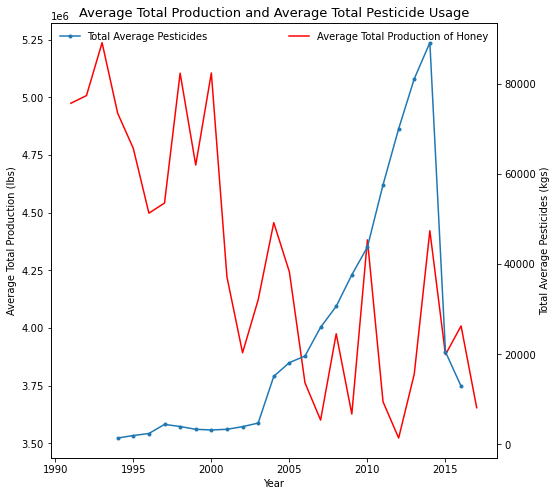

In [17]:
#Double Axis Line Chart

#Python code for price per year in RED
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(df.groupby(["year"])["totalprod"].mean(), label='AVG Total Production of Honey', color= 'red')

ax.set_xlabel('Year')
ax.set_ylabel('Average Total Production (lbs)')
#ax.set_ylim(ymin=0, ymax = 3)

#Python code yield per colony in GOLD
ax2 = ax.twinx()

ax2.plot(df.groupby(["year"])["nAllNeonic"].mean(), label='AVG Total Pesticide Usage', marker = '.')

#labels for axis and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Average Pesticides (kgs)')
ax2.set_title('Average Total Production and Average Total Pesticide Usage', fontsize=13)
#ax2.set_ylim(ymin=0, ymax = 30)

#legend location
var=ax.legend(['Average Total Production of Honey'], frameon = False)
var= ax2.legend(['Total Average Pesticides'], frameon = False,loc = 'upper left')


- The Average production dropped massively in 2003, to recover slightly afterwards and fluctuating around an average Total Production Value of 4.
- The introduction of pesticides in year 2004 onwards had an implication in the drop of the Average total production. However, it might not be the only reason behind the drop of the average production.
- The drop of pesticide usage in 2015 had a slight correlation with production slight increase to 4.08 from 3.5 million

In [18]:
# Delete this. Tried to clip interquartile range items and plot, but it did not work out
# t_q3, t_q1 = np.percentile(df["totalprod"], [75 ,25])
# t_iqr = t_q3 - t_q1
# x=df.groupby(["year"])["totalprod"].mean()
# y=df.groupby(["year"])["nAllNeonic"].mean()


# whatthefak=df.copy()
# whatthefak["totalprod"].clip(lower=t_iqr-1.5*t_q1,upper=t_iqr+1.5*t_q3)


# with sns.axes_style('white'):
#     sns.jointplot(x="totalprod", y="nAllNeonic", data=df, kind='hex')

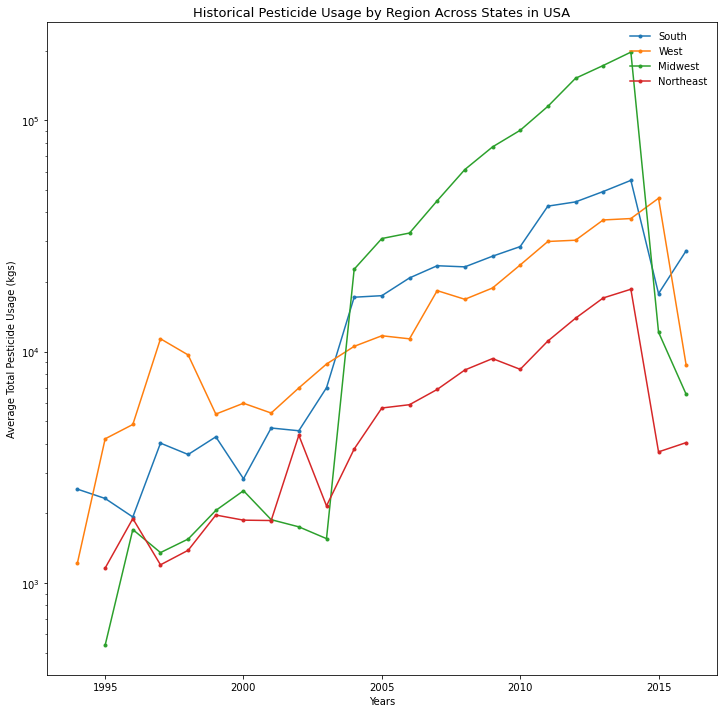

In [19]:

# Allow plots to te embedded within the notebook
%matplotlib inline
# Adding variables to the plot - fig and ax (Figure and axes)
fig, ay = plt.subplots(figsize = (12, 12))

# Setting up the outer plot text (titles and labels)
ay.set_xlabel('Years')
ay.set_ylabel('Average Total Pesticide Usage (kgs)')
ay.set_title('Historical Pesticide Usage by Region Across States in USA', fontsize=13)
 

for j in dfinal["regions"].unique():
    Y = pd.DataFrame(dfinal.loc[dfinal["regions"] == j,].groupby(["year"])["nAllNeonic"].mean())
    ay.plot(Y.index, Y["nAllNeonic"], marker = '.', label = j)

 
# Ploting a legend

ay.set_yscale("log")
var = ay.legend(loc='upper right',frameon=False)

- Year 2003 forward marked an increase of Pesticide usage in all the regions.
- Midwest had the highest increase of pesticide usage increase compared to the other regions.
- The Pesticide trend started in 2003 up until 2014 where all the regions showed a similar usage trend. The drop of pesticide usage was marked in year 2014, where all regions decreased massively their pesticide usage pattern.

In [21]:
# This worked on some colleagues computers but not others.
# dfinal["East_West"]= ""

# for i in (range(len(dfinal))):
#     if dfinal.loc[i,"Region"] == "West" or dfinal.loc[i,"Region"] == "Midwest":
#         dfinal.loc[i,"East_West"] = "West"
#     else:
#         dfinal.loc[i,"East_West"] = "East"
        
# sns.violinplot(x="year",y="nAllNeonic", hue="East_West", data=dfinal[dfinal["year"].isin(range(2004,2016))], palette= "Set3", split=True);
# sns.set(rc={'figure.figsize':(16,13)})
# plt.show()

Text(0.5, 1.0, 'Pesticide Type Usage Per Region')

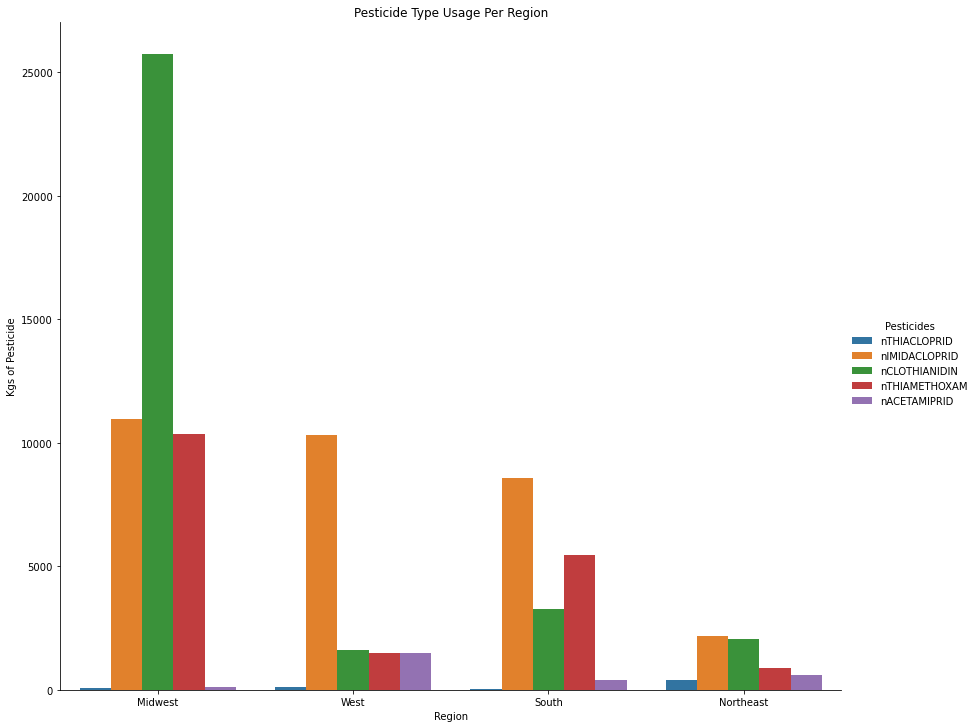

In [22]:
# Creating a new dataframe with the 5 different types of Pesticides

newDF = df.loc[:,['year','Region',"nCLOTHIANIDIN","nIMIDACLOPRID","nTHIAMETHOXAM","nACETAMIPRID","nTHIACLOPRID"]]
newDF = newDF.melt(id_vars=["year", "Region"], 
                   var_name="Pesticides", 
                   value_name="Value").sort_values('year').reset_index(drop=True)

sns.catplot(x='Region',
            y='Value',
            kind='bar',
            ci=None,
            hue='Pesticides',
            height=10,
            aspect=1.2,
            data=newDF, 
            order=["Midwest","West","South","Northeast"])

plt.ylabel('Kgs of Pesticide')
plt.title('Pesticide Type Usage Per Region')

- Midwest region was the region investing more in pesticide consumption. The top pesticide type used was the nCLOTHIANIDIN with over 25000 in value. 
- The massive usage of this type of pesticide can explain the gradual drop of production (recorded in the previous production graph).
- Midwest was followed by South and the then West in terms of pesticide consumption.

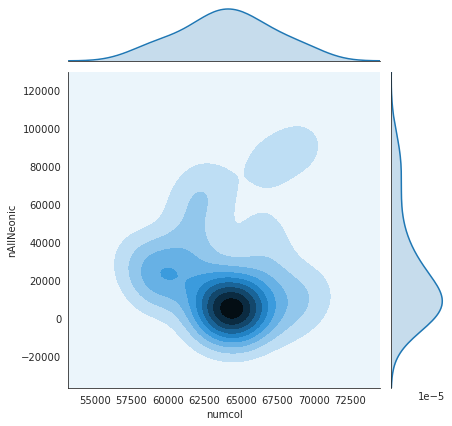

In [23]:
dfinal_avg=dfinal.groupby("year").mean()
with sns.axes_style('white'):
    sns.jointplot("numcol", "nAllNeonic", data=dfinal_avg, kind='kde');


### As a whole, there are more colonies present when there are less pollination, however there seems to be a small section of outliers that have a large number of colonies when there is a large quantity of pesticides. 
#### One hypothesis for this weird trend is that beekeepers create more hives or perform "hive splits" due to the low number or bees available and decreased yield/efficiency

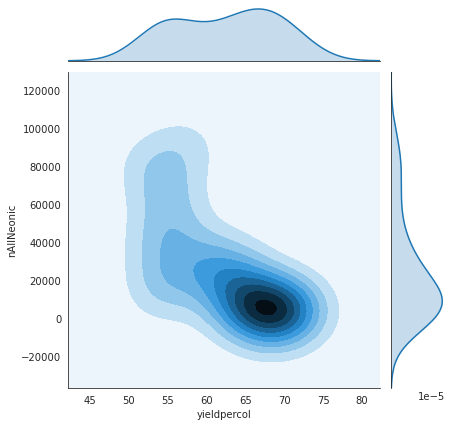

In [24]:
dfinal_avg=dfinal.groupby("year").mean()
with sns.axes_style('white'):
    sns.jointplot("yieldpercol", "nAllNeonic", data=dfinal_avg, kind='kde');


###  As part of the theory, it seems that there is a larger yield of honey when there are less pesticides present, which seems to hold true.

### Bad for the bees and the honey production, but we believe that it is also bad for the fruit production

------

# Fruits

### Apples, blueberries, and especially almonds are highly dependent on the pollination from honeybees and other animals. Almonds are especially known, as roughly 70% of all commercial beefarmers load their beehives onto trucks and drive to california in order to pollinate almond trees for a few short weeks

In [25]:
crops_bees_apples=crops_bees[crops_bees["Item"]=="Apples"]
crops_bees_blueberries=crops_bees[crops_bees["Item"]=="Blueberries"]
crops_bees_almonds=crops_bees[crops_bees["Item"]=="Almonds, with shell"]

# Apples 

Text(0, 0.5, 'Hg/Ha of Apples')

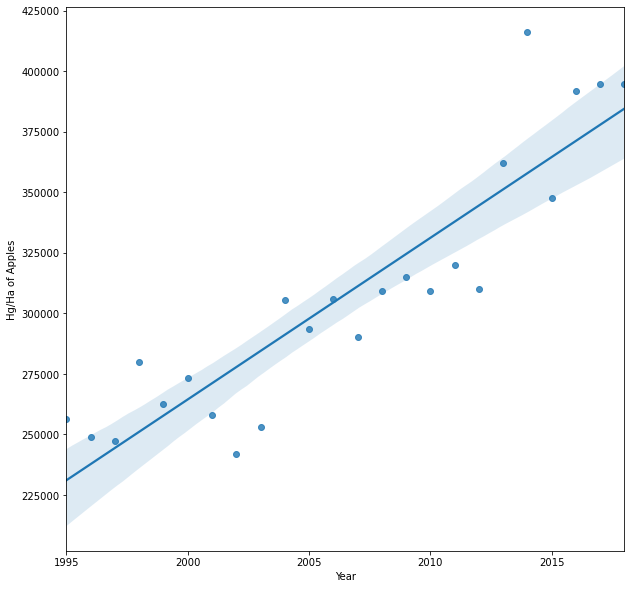

In [26]:
#Apples
apple_yield = crops_yield_fin.loc[crops_yield['Item'] == "Apples"].sort_values(by='Year Code')
plt.figure(figsize=(10,10))
plot=sns.regplot(x=apple_yield["Year"],y=apple_yield["Value"], fit_reg=True)
plt.ylabel('Hg/Ha of Apples')

### This shows that there has been an upward trend of apple production, however no insight as to bee related. 


Text(0, 0.5, 'Hg/Ha of Apples')

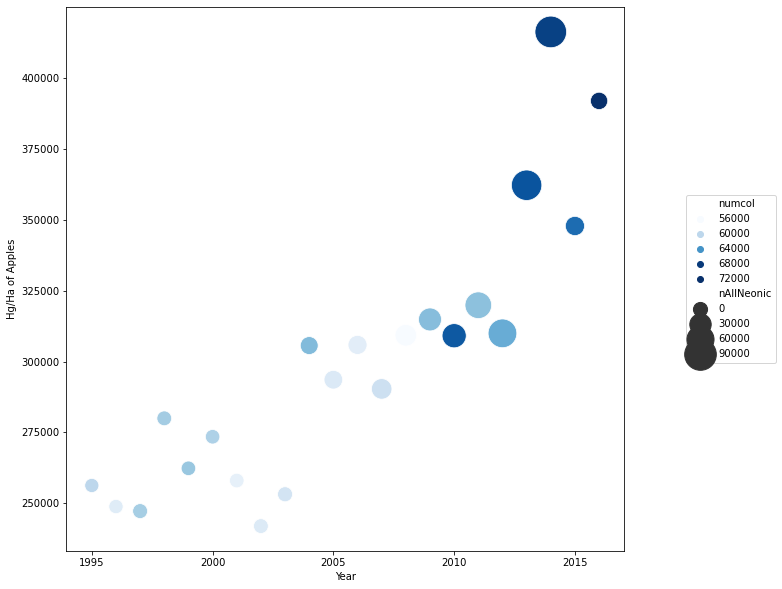

In [27]:
crops_bees=crops_bees.reset_index()
crops_bees_apples=crops_bees_apples.dropna()

plt.figure(figsize=(10,10))
scatter = sns.scatterplot('Year',
                y = "Value",\
               hue = "numcol",
#                hue_norm=(min("numcol"),max("numcol")), 
                data = crops_bees_apples,
                     palette="Blues",
                size = "nAllNeonic",
                    sizes=(200,1000))
legend=scatter.legend(loc='center right', bbox_to_anchor = (1.28,0.5))
plt.ylabel('Hg/Ha of Apples')

### When looking at the graph, it can be seen that the larger the bubble, the more pesticides have been used. The darker the blue, the more bee colonies exist, and the Y axis displays the the value of the apple crop, however no reference is given in regards to price per apple or yield to achieve further granularity

### Overall from looking at this graph, it seems that the number of bee colonies actually grows with the pesticides used. This is interesting

Text(0, 0.5, 'Hg/Ha of Blueberries')

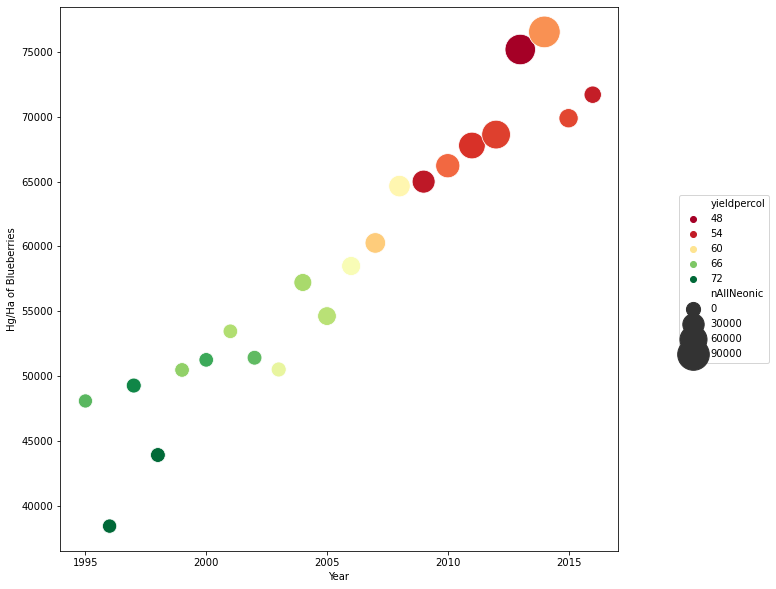

In [28]:

plt.figure(figsize=(10,10))
scatter = sns.scatterplot('Year',
                y = "Value",\
               hue = "yieldpercol",
#                hue_norm=(min("numcol"),max("numcol")), 
                data = crops_bees_blueberries,
                     palette="RdYlGn",
                size = "nAllNeonic",
                    sizes=(200,1000))
legend=scatter.legend(loc='center right', bbox_to_anchor = (1.28,0.5))
plt.ylabel('Hg/Ha of Blueberries')

### This graph however paints a completely different story when the hue has been changed to the colony yield. It shows a stark difference as of 2006 between yield of colonies. In these cases, it shows that the more pesticides being used (which are larger circles), the less yield the bees have
### Because of this, we can show that an increased use of pesticides, although there are more behives, affect the bees and essentially decreases their production. To compensate for the lower production, lower population, or decreased efficiency of pollination, honeybee keepers must therefore create more beehives

# Apples

In [29]:
crops_bees_apples.columns

# almond_yield = crops_yield_fin.loc[crops_yield['Item'] == "Almonds, with shell"].sort_values(by='Year Code')

Index(['Year', 'Item', 'Area Code', 'Element Code', 'Item Code', 'Year Code',
       'Value', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'FIPS', 'nCLOTHIANIDIN', 'nIMIDACLOPRID',
       'nTHIAMETHOXAM', 'nACETAMIPRID', 'nTHIACLOPRID', 'nAllNeonic'],
      dtype='object')

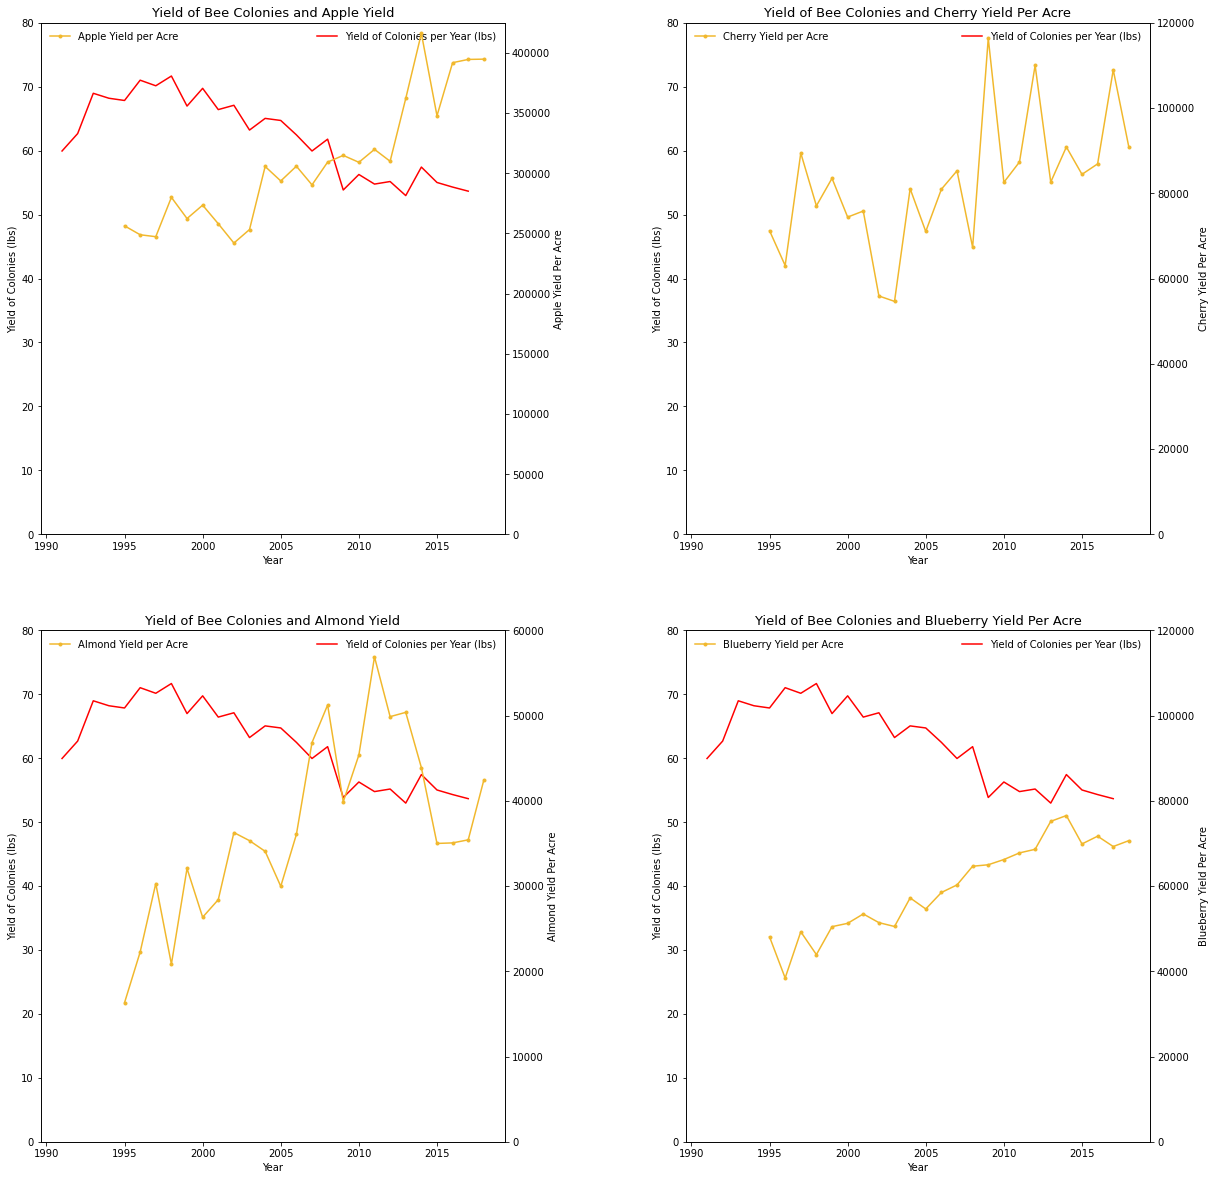

In [30]:
# Allow plots to te embedded within the notebook
%matplotlib inline

#Python code for price per year in RED
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (20, 20))
fig.tight_layout(pad=15.0,h_pad=7.5)

ax[0,0].plot(dfinal[['yieldpercol','year']].groupby(['year']).mean(), color= 'red')
#ax.plot(df_CA_Final[['yieldpercol','year']].groupby(['year']).mean(), color= 'red')

ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Yield of Colonies (lbs)')
ax[0,0].set_ylim(ymin=0, ymax = 80)

#Python code yield per colony in GOLD
ax2 = ax[0,0].twinx()

ax2.plot(apple_yield[['Value','Year Code']].groupby(['Year Code']).sum(), '#F1B82D', marker = '.')
#ax2.plot(almonds_df[['lbs Yield pr acre','year']].groupby(['year']).sum()//10000000, '#F1B82D', marker = '.')

#labels for axis and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Apple Yield Per Acre')
ax2.set_title('Yield of Bee Colonies and Apple Yield', fontsize=13)
ax2.set_ylim(ymin=0, ymax = 425000)

#legend location
var=ax[0,0].legend(['Yield of Colonies per Year (lbs)'], frameon = False)
var= ax2.legend(['Apple Yield per Acre'], frameon = False,loc = 'upper left')



#ALMONDS
almond_yield = crops_yield_fin.loc[crops_yield['Item'] == "Almonds, with shell"].sort_values(by='Year Code')

ax[1,0].plot(dfinal[['yieldpercol','year']].groupby(['year']).mean(), color= 'red')
#ax.plot(df_CA_Final[['yieldpercol','year']].groupby(['year']).mean(), color= 'red')

ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Yield of Colonies (lbs)')
ax[1,0].set_ylim(ymin=0, ymax = 80)

#Python code yield per colony in GOLD
ax2 = ax[1,0].twinx()

ax2.plot(almond_yield[['Value','Year Code']].groupby(['Year Code']).sum(), '#F1B82D', marker = '.')
#ax2.plot(almonds_df[['lbs Yield pr acre','year']].groupby(['year']).sum()//10000000, '#F1B82D', marker = '.')

#labels for axis and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Almond Yield Per Acre')
ax2.set_title('Yield of Bee Colonies and Almond Yield', fontsize=13)
ax2.set_ylim(ymin=0, ymax = 60000)

#legend location
var=ax[1,0].legend(['Yield of Colonies per Year (lbs)'], frameon = False)
var= ax2.legend(['Almond Yield per Acre'], frameon = False,loc = 'upper left')




#CHERRIES
cherry_yield = crops_yield_fin.loc[crops_yield['Item'] == "Cherries"].sort_values(by='Year Code')

ax[0,1].plot(dfinal[['numcol','year']].groupby(['year']).mean(), color= 'red')
#ax.plot(df_CA_Final[['yieldpercol','year']].groupby(['year']).mean(), color= 'red')

ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Yield of Colonies (lbs)')
ax[0,1].set_ylim(ymin=0, ymax = 80)

#Python code yield per colony in GOLD
ax2 = ax[0,1].twinx()

ax2.plot(cherry_yield[['Value','Year Code']].groupby(['Year Code']).sum(), '#F1B82D', marker = '.')
#ax2.plot(almonds_df[['lbs Yield pr acre','year']].groupby(['year']).sum()//10000000, '#F1B82D', marker = '.')

#labels for axis and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Cherry Yield Per Acre')
ax2.set_title('Yield of Bee Colonies and Cherry Yield Per Acre', fontsize=13)
ax2.set_ylim(ymin=0, ymax = 120000)

#legend location
var=ax[0,1].legend(['Yield of Colonies per Year (lbs)'], frameon = False)
var= ax2.legend(['Cherry Yield per Acre'], frameon = False,loc = 'upper left')




#BLUEBERRIES
bb_yield = crops_yield_fin.loc[crops_yield['Item'] == "Blueberries"].sort_values(by='Year Code')

ax[1,1].plot(dfinal[['yieldpercol','year']].groupby(['year']).mean(), color= 'red')
#ax.plot(df_CA_Final[['yieldpercol','year']].groupby(['year']).mean(), color= 'red')

ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Yield of Colonies (lbs)')
ax[1,1].set_ylim(ymin=0, ymax = 80)

#Python code yield per colony in GOLD
ax2 = ax[1,1].twinx()

ax2.plot(bb_yield[['Value','Year Code']].groupby(['Year Code']).sum(), '#F1B82D', marker = '.')
#ax2.plot(almonds_df[['lbs Yield pr acre','year']].groupby(['year']).sum()//10000000, '#F1B82D', marker = '.')

#labels for axis and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Blueberry Yield Per Acre')
ax2.set_title('Yield of Bee Colonies and Blueberry Yield Per Acre', fontsize=13)
ax2.set_ylim(ymin=0, ymax = 120000)

#legend location
var=ax[1,1].legend(['Yield of Colonies per Year (lbs)'], frameon = False)
var= ax2.legend(['Blueberry Yield per Acre'], frameon = False,loc = 'upper left')

-----
# Now to look at the change of temperature over time and how it may affect the bees
-----

In [31]:
tempature_complete=temp_df.merge(dfinal,how="inner",left_on=["Shortcut","Date"], right_on=["state","year"])
tempature_complete["Difference from 1901-2000"] = pd.to_numeric(tempature_complete["Difference from 1901-2000"], downcast="float")
tempature_complete[" Average Temperature"] = pd.to_numeric(tempature_complete[" Average Temperature"], downcast="float")

In [32]:
tempature_complete["Ratio"]=tempature_complete["yieldpercol"]/tempature_complete[" Average Temperature"]


In [33]:
import plotly.express as px
import pandas as pd


p1=px.choropleth(tempature_complete, 
              locations = 'state',
              color=" Average Temperature", 
              animation_frame="year",
              color_continuous_scale ="inferno",
              locationmode='USA-states',
              scope="usa",
              range_color=(25, 90),
              title='Average Temperature by State (1991-2020)',
              height=600
             )
p2=px.choropleth(tempature_complete, 
              locations = 'state',
              color="nAllNeonic", 
              animation_frame="year",
              color_continuous_scale ="twilight",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 303011),
              title='Total Pesticide use by State (1991-2020)',
              height=600
             )
p3=px.choropleth(tempature_complete, 
              locations = 'state',
              color="yieldpercol", 
              animation_frame="year",
              color_continuous_scale ="picnic",
              locationmode='USA-states',
              scope="usa",
              range_color=(15, 140),
              title='Average Bee Colony Yield by State (1991-2020)',
              height=600
             )

p4=px.choropleth(tempature_complete, 
              locations = 'state',
              color="Ratio", 
              animation_frame="year",
              color_continuous_scale ="twilight",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 3),
              title='Ratio of Yield per Colony with Temperature by State (1991-2020)',
              height=600
             )

In [34]:
p1

In [35]:
p2

In [36]:
p3

In [37]:
p4

# The graphs show the changes of temperature, bees, and pesticide use over time

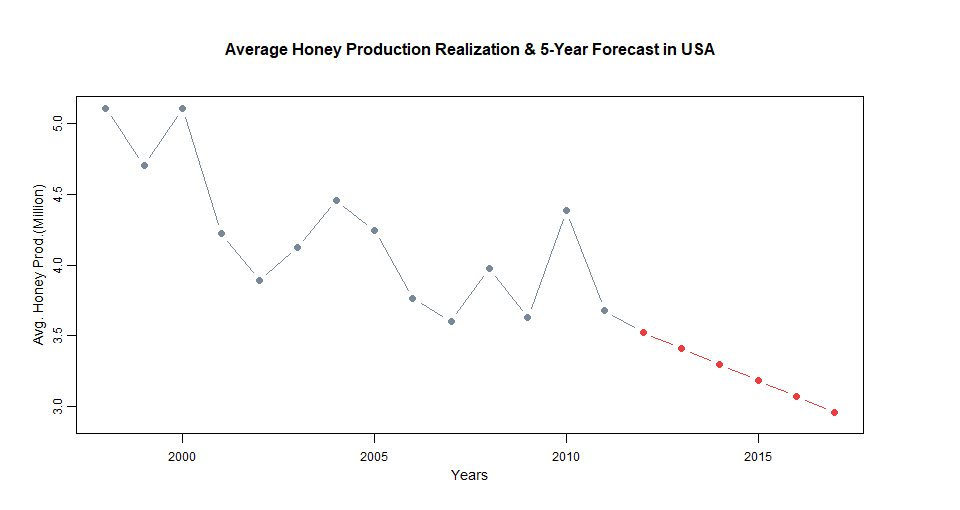

In [38]:
from IPython.display import Image
Image(filename="Forecast.png")

### Insights and further thoughts and comments

-------------
# Everything below are extra slides
-----------------


### Comment: Addtional information on the columns in the dataset
*state*: The shortcode for the corresponding state in USA.

*numcol*: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year.

*yieldpercol*: Honey yield per colony. Unit is pounds.

*totalprod*: Total production (numcol x yieldpercol). Unit is pounds.

*stocks*: Refers to stocks held by producers. Unit is pounds.

*priceperlb*: Refers to average price per pound based on expanded sales. Unit is dollars.

*prodvalue*: Value of production (totalprod x priceperlb). Unit is dollars.

Source: https://www.kaggle.com/jessicali9530/honey-production

In [39]:
# Filtering on the states with the lowest yield per colony
df.nlargest(5, 'yieldpercol')

state    numcol  yieldpercol   totalprod     stocks  priceperlb  \
193    HI    9000.0          177   1593000.0  1020000.0        0.52   
190    HI    8000.0          155   1240000.0    62000.0        0.81   
192    HI    9000.0          146   1314000.0   158000.0        0.86   
191    HI    9000.0          138   1242000.0   460000.0        0.54   
611    ND  235000.0          138  32430000.0  7459000.0        0.48   

      prodvalue  year     StateName   Region  FIPS  nCLOTHIANIDIN  \
193    828000.0  1993        Hawaii     West    15            NaN   
190   1004000.0  1996        Hawaii     West    15            NaN   
192   1130000.0  1997        Hawaii     West    15            NaN   
191    671000.0  1992        Hawaii     West    15            NaN   
611  15566000.0  1994  North Dakota  Midwest    38            NaN   

     nIMIDACLOPRID  nTHIAMETHOXAM  nACETAMIPRID  nTHIACLOPRID  nAllNeonic  
193            NaN            NaN           NaN           NaN         NaN  
190            NaN            NaN           NaN           NaN         NaN  
192            NaN            NaN           NaN           NaN         NaN  
191            NaN            NaN           NaN           NaN         NaN  
611            NaN            NaN           NaN           NaN         NaN

In [40]:
# Filtering on the states with the lowest yield per colony
df.nsmallest(5, 'yieldpercol')

state   numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
418    ME   8000.0           19   152000.0    9000.0        0.70   106000.0   
668    NJ  10000.0           19   190000.0  101000.0        1.60   304000.0   
427    ME  11000.0           20   220000.0  106000.0        0.79   174000.0   
428    ME  11000.0           21   231000.0  143000.0        0.75   173000.0   
424    ME  15000.0           22   330000.0  122000.0        0.77   254000.0   

     year   StateName     Region  FIPS  nCLOTHIANIDIN  nIMIDACLOPRID  \
418  1997       Maine  Northeast    23            0.0         2408.3   
668  2003  New Jersey  Northeast    34            0.0          455.1   
427  2001       Maine  Northeast    23            0.0         3353.3   
428  2000       Maine  Northeast    23            0.0         4299.4   
424  1992       Maine  Northeast    23            NaN            NaN   

     nTHIAMETHOXAM  nACETAMIPRID  nTHIACLOPRID  nAllNeonic  
418            0.0           0.0           0.0      2408.3  
668          129.3           0.0           0.0       584.4  
427            0.0           0.0           0.0      3353.3  
428            0.0           0.0           0.0      4299.4  
424            NaN           NaN           NaN         NaN

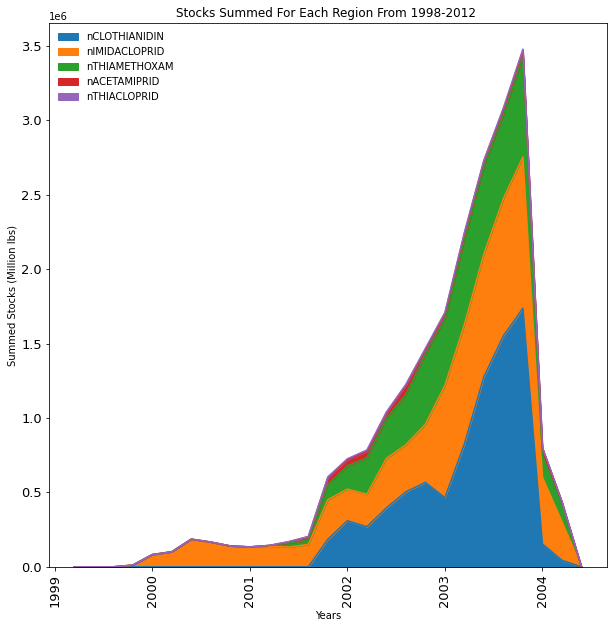

In [41]:
total_pesticide=df.groupby("year").sum()[["nCLOTHIANIDIN","nIMIDACLOPRID","nTHIAMETHOXAM","nACETAMIPRID","nTHIACLOPRID"]]
total_pesticide=total_pesticide.dropna()
# total_pesticide=total_pesticide.reset_index()

# Adding variables to the plot
ax = total_pesticide.plot(kind='area',stacked=True,figsize=(10,10),\
                  title = 'Stocks Summed For Each Region From 1998-2012 ', fontsize=13)\

# Ploting a legend
var = ax.legend(frameon=False)

# Rotation of x-axis
s1 = ax.set_xlabel("Years")
s2 = ax.set_ylabel("Summed Stocks (Million lbs)")
s = ax.set_xticklabels(labels = bars_df.index,rotation=90)



In [42]:
df.groupby("state").sum()[["nCLOTHIANIDIN","nIMIDACLOPRID","nTHIAMETHOXAM","nACETAMIPRID","nTHIACLOPRID","nAllNeonic"]]

nCLOTHIANIDIN  nIMIDACLOPRID  nTHIAMETHOXAM  nACETAMIPRID  \
state                                                              
AL           50080.3        77446.4        58459.8           0.0   
AR           59222.9       158355.2       247340.0       17007.9   
AZ            9231.5       203526.7         9596.2       19972.3   
CA          177978.7      1494180.1        99386.3      221896.1   
CO           92480.9        42118.5        38326.3          12.2   
FL            3095.9       574983.7        83654.4        4156.4   
GA           39104.0       275735.0       140437.3         404.6   
HI               0.0            0.0            0.0           0.0   
IA         1180076.4       354470.1       439358.6         133.8   
ID           23901.9       255142.0        45826.8        1237.9   
IL         1278262.2       427155.6       271429.7        1500.8   
IN          681397.3       301938.1       151455.8         606.7   
KS          326642.5       194640.8       200359.0          36.9   
KY          136059.6       143939.6        45812.5         488.6   
LA           33214.0       157094.7       164772.8        6301.2   
MD               0.0         3901.3           74.3           1.3   
ME            1108.2        68143.0        12159.7        4290.8   
MI          219703.9       177526.3       128069.6       11337.2   
MN          769321.9       254182.5       263063.7        1649.2   
MO          292444.8       241869.6       212603.9        6355.7   
MS           80069.1       181593.3       227538.7       11818.1   
MT           10204.0        54693.3        28774.4          66.1   
NC          121390.3       185759.7       110039.8        4793.4   
ND          248596.7       238821.9       196159.4           0.0   
NE          713670.1       196244.1       321385.0           1.5   
NJ            9595.9        15408.0         4894.3        5779.6   
NM            7130.0        34104.8         4790.9         581.0   
NV              35.4         2005.5          250.8          11.6   
NY           86514.3        85194.4        35749.2       36954.6   
OH          315933.9       207320.6       155896.1        2841.8   
OK               0.0         2243.2           54.0         141.0   
OR            8272.7        67492.3        24175.5       12145.0   
PA          124955.7        67465.3        41914.1       17139.8   
SC           10518.0        22744.2         8196.3         112.5   
SD          467919.7       143669.9       222704.3           0.0   
TN           92528.5       138075.4       142031.9        8755.3   
TX          276858.5       494038.3       324548.2       50575.6   
UT            2894.9         3970.9         1693.8         228.0   
VA           42033.2        62937.8        30662.3       10151.0   
VT            5102.4         2944.6         1968.1         886.6   
WA           31791.1       248538.3        87689.8       86697.6   
WI          247829.5       136316.6       147808.8        3817.8   
WV            3955.8         4872.5         1943.2        3901.2   
WY            6870.6         2184.7         4210.5           0.0   

       nTHIACLOPRID  nAllNeonic  
state                            
AL              0.0    185986.5  
AR              0.0    481926.0  
AZ              0.0    242326.7  
CA             85.9   1993527.1  
CO              0.0    172937.9  
FL              0.0    665890.4  
GA            116.0    455796.9  
HI              0.0         0.0  
IA              0.0   1974038.9  
ID            263.0    326371.6  
IL            174.8   1978523.1  
IN            229.9   1135627.8  
KS            235.3    721914.5  
KY              3.0    326303.3  
LA              0.0    361382.7  
MD              0.0      3976.9  
ME              0.0     85701.7  
MI          13411.4    550048.4  
MN              0.0   1288217.3  
MO             49.4    753323.4  
MS              0.0    501019.2  
MT              0.0     93737.8  
NC           2023.0    424006.2  
ND              0.0    68357

In [43]:
# Filtering on the states with the highest yield per colony
df.nlargest(5, 'yieldpercol')

state    numcol  yieldpercol   totalprod     stocks  priceperlb  \
193    HI    9000.0          177   1593000.0  1020000.0        0.52   
190    HI    8000.0          155   1240000.0    62000.0        0.81   
192    HI    9000.0          146   1314000.0   158000.0        0.86   
191    HI    9000.0          138   1242000.0   460000.0        0.54   
611    ND  235000.0          138  32430000.0  7459000.0        0.48   

      prodvalue  year     StateName   Region  FIPS  nCLOTHIANIDIN  \
193    828000.0  1993        Hawaii     West    15            NaN   
190   1004000.0  1996        Hawaii     West    15            NaN   
192   1130000.0  1997        Hawaii     West    15            NaN   
191    671000.0  1992        Hawaii     West    15            NaN   
611  15566000.0  1994  North Dakota  Midwest    38            NaN   

     nIMIDACLOPRID  nTHIAMETHOXAM  nACETAMIPRID  nTHIACLOPRID  nAllNeonic  
193            NaN            NaN           NaN           NaN         NaN  
190            NaN            NaN           NaN           NaN         NaN  
192            NaN            NaN           NaN           NaN         NaN  
191            NaN            NaN           NaN           NaN         NaN  
611            NaN            NaN           NaN           NaN         NaN

### Comment: From the 2 tables above, which show the 5 smallest and highest yield per colony values in the dataset. 4 out of the 5 smallest values are recorded in the state of 'ME'. Furthermore there is a 615% difference between the highest and smallest value.

In [44]:
# Checking for missing values (i.e. null)
df.isnull().sum()

state              0
numcol             0
yieldpercol        0
totalprod          0
stocks             0
priceperlb         0
prodvalue          0
year               0
StateName          0
Region             0
FIPS               0
nCLOTHIANIDIN    237
nIMIDACLOPRID    237
nTHIAMETHOXAM    237
nACETAMIPRID     237
nTHIACLOPRID     237
nAllNeonic       237
dtype: int64

# 3.1 Multiple Line Chart

## 3.1.1 - Annual Honey Consumption (in Pounds) Per State

In [45]:
dfixed=dfinal.groupby(["year","state"]).mean()
dfixed=dfixed.reset_index()
dfixed

year state    numcol  yieldpercol   totalprod     stocks  priceperlb  \
0     1991    AL   23000.0           24    552000.0    66000.0        0.63   
1     1991    AR   47000.0           79   3713000.0   557000.0        0.54   
2     1991    AZ   75000.0           50   3750000.0   750000.0        0.53   
3     1991    CA  520000.0           63  32760000.0  3276000.0        0.54   
4     1991    CO   50000.0           79   3950000.0   514000.0        0.63   
...    ...   ...       ...          ...         ...        ...         ...   
1070  2017    VT    7000.0           45    315000.0   120000.0        4.17   
1071  2017    WA   77000.0           45   3465000.0  1594000.0        2.25   
1072  2017    WI   53000.0           56   2968000.0   683000.0        2.77   
1073  2017    WV    6000.0           40    240000.0    50000.0        3.85   
1074  2017    WY   39000.0           53   2067000.0   186000.0        1.59   

       prodvalue  FIPS  nCLOTHIANIDIN  nIMIDACLOPRID  nTHIAMETHOXAM  \
0       348000.0     1            NaN            NaN            NaN   
1      2005000.0     5            NaN            NaN            NaN   
2      1988000.0     4            NaN            NaN            NaN   
3     17690000.0     6            NaN            NaN            NaN   
4      2489000.0     8            NaN            NaN            NaN   
...          ...   ...            ...            ...            ...   
1070   1314000.0    50            NaN            NaN            NaN   
1071   7796000.0    53            NaN            NaN            NaN   
1072   8221000.0    55            NaN            NaN            NaN   
1073    924000.0    54            NaN            NaN            NaN   
1074   3287000.0    56            NaN            NaN            NaN   

      nACETAMIPRID  nTHIACLOPRID  nAllNeonic  consumption  
0              NaN           NaN         NaN     486000.0  
1              NaN           NaN         NaN    3156000.0  
2              NaN           NaN         NaN    3000000.0  
3              NaN           NaN         NaN   29484000.0  
4              NaN           NaN         NaN    3436000.0  
...            ...           ...         ...          ...  
1070           NaN           NaN         NaN     195000.0  
1071           NaN           NaN         NaN    1871000.0  
1072           NaN           NaN         NaN    2285000.0  
1073           NaN           NaN         NaN     190000.0  
1074           NaN           NaN         NaN    1881000.0  

[1075 rows x 16 columns]

## Annual Honey Price (USD per lbs) Per State (EXTRA)

Text(0.5, 1.0, 'Historical Honey Price in USA')

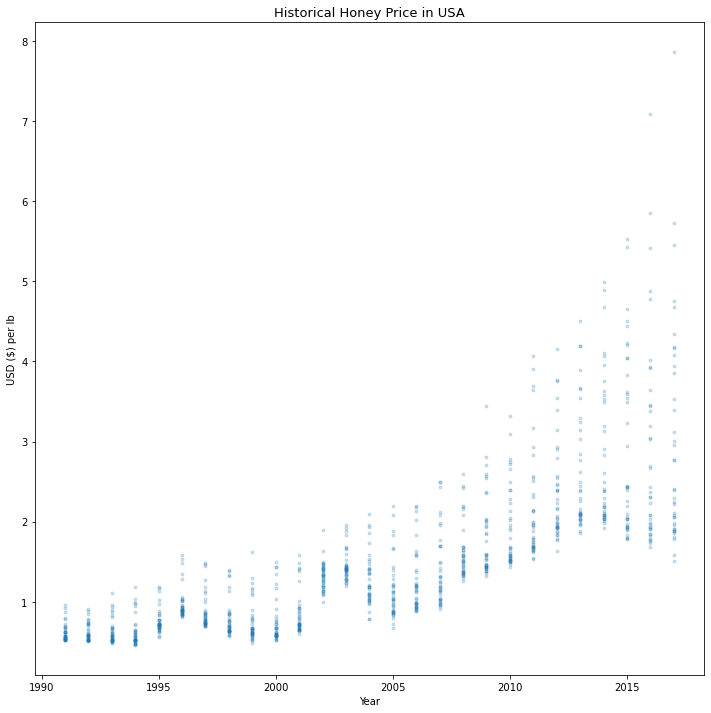

In [46]:
# Allow plots to te embedded within the notebook
%matplotlib inline
# Adding variables to the plot - fig and ax (Figure and axes)
fig, ax = plt.subplots(figsize = (12, 12))

# Plot the scatterplot
ax.plot(dfinal.year, dfinal.priceperlb, marker = '.', alpha = .2, linestyle = 'None')

ax.set_xlabel('Year')
ax.set_ylabel('USD ($) per lb')
ax.set_title('Historical Honey Price in USA', fontsize=13)

### So What? 
### Price is about the same for all states with a few outliers. In 1998, price was below 1 USD, and in 2012 prices range from 1.50 USD and above.  
### Could  be due to different classifications of honey, such as classifications of non-GMO, 'all natural', or is it due to scarcity?

##  Annual Production (lbs) and Annual Honey Price (in USD) per lbs (EXTRA)

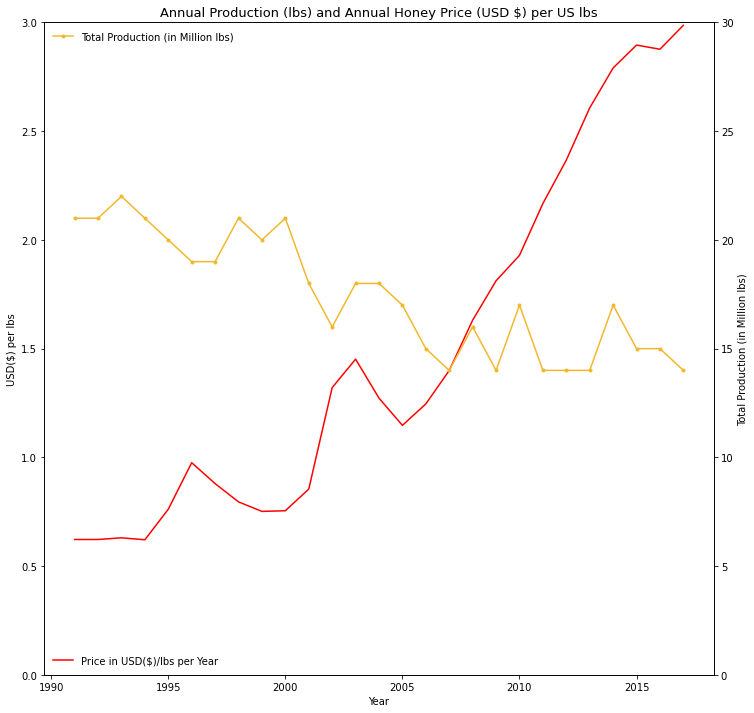

In [47]:
#Double Axis Line Chart

#Python code for price per year in RED
fig, ax = plt.subplots(figsize = (12, 12))

ax.plot(dfinal[['priceperlb','year']].groupby(['year']).mean(), color= 'red')

ax.set_xlabel('Year')
ax.set_ylabel('USD($) per lbs')
ax.set_ylim(ymin=0, ymax = 3)

#Python code yield per colony in GOLD
ax2 = ax.twinx()

ax2.plot(dfinal[['totalprod','year']].groupby(['year']).sum()//10000000, '#F1B82D', marker = '.')


#labels for axis and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Production (in Million lbs)')
ax2.set_title('Annual Production (lbs) and Annual Honey Price (USD $) per US lbs', fontsize=13)
ax2.set_ylim(ymin=0, ymax = 30)

#legend location
var=ax.legend(['Price in USD($)/lbs per Year'], frameon = False,loc = 'lower left')
var= ax2.legend(['Total Production (in Million lbs)'], frameon = False,loc = 'upper left')

### So What?
### Prices have increased because the total US honey production has decreased. Scarcity leads to higher prices and the shortage does not come from higher consumption, as consumption was shown to be consistent. Lets take a look at the honey stock (or amount of honey being saved annually). Higher prices should also have the effect of attracting more suppliers to the market in the coming years. Afterall prices have increased by around 250% from below 1 USD to 2.5 USD per lbs